In [16]:
from sklearn import datasets
iris = datasets.load_iris()
print("feature_data:",iris.data.shape)
print("feature_data:",iris.target.shape)
print(iris.feature_names)

feature_data: (150, 4)
feature_data: (150,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [17]:
import numpy as np
X = np.array([[x[0],x[3]]for x in iris.data])
Y = np.array([1 if y==0 else -1 for y in iris.target])

In [18]:
train = np.random.choice(len(X),round(len(X)*0.8),replace=False)
test = np.array(list(set(range(len(X)))-set(train)))
X_tr = X[train]
X_te = X[test]
Y_tr = Y[train]
Y_te = Y[test]

In [19]:
import tensorflow as tf

In [20]:
batch_size = 120


# SVM Model

In [21]:
X_var = tf.placeholder(shape = [None, 2], dtype =tf.float32)
Y_var = tf.placeholder(shape = [None,1] , dtype =tf.float32)

W = tf.Variable(tf.random_normal(shape=[2,1]),name='weight')
B = tf.Variable(tf.random_normal(shape=[1,1]),name='bias')

print(X_var.shape)
print(W)

(?, 2)
<tf.Variable 'weight:0' shape=(2, 1) dtype=float32_ref>


In [22]:

Output = tf.subtract(tf.matmul(X_var,W),B)
alpha = tf.constant([0.01])
#l2_norm
l2_norm = tf.reduce_sum(tf.square(W))
#margin_term in Loss
classification_term = tf.reduce_mean(tf.maximum(0.,tf.subtract(1.,tf.multiply(Output,Y_var))))
loss = tf.add(classification_term,tf.multiply(alpha,l2_norm))

In [23]:
# accuracy 및 optimizer정의
sess = tf.Session()
pred = tf.sign(Output)
accuracy = tf.reduce_mean(tf.cast(tf.equal(pred,Y),tf.float32))

my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)

init = tf.global_variables_initializer()
sess.run(init)



In [24]:
loss_vec = []
train_accuracy =[]
test_accuracy=[]
for i in range(1000):
    rand_index = np.random.choice(len(X_tr),size=batch_size)
    rand_x = X_tr[rand_index]
    rand_y = np.transpose([Y_tr[rand_index]])
    sess.run(train_step, feed_dict={
        X_var : rand_x,
        Y_var : rand_y
    })
    
    temp_loss = sess.run(loss,feed_dict={
        X_var : rand_x,
        Y_var : rand_y
    })
    loss_vec.append(temp_loss)
    
    train_acc_temp = sess.run(accuracy,feed_dict={
        X_var : rand_x,
        Y_var : np.transpose([Y_tr])
    })
    train_accuracy.append(train_acc_temp)
    
    test_acc_temp = sess.run(accuracy, feed_dict={
        X_var : X_te,
        Y_var : np.transpose([Y_te])
    })
    
    test_accuracy.append(test_acc_temp)
    
    if(i+1)%100==0:
        print('Step #{} W = {} B= {}'.format(str(i+1),str(sess.run(W)),str(sess.run(B))))
        print('Loss = ' + str(temp_loss))
        


Step #100 W = [[ 0.20394273]
 [-0.94218266]] B= [[0.78497565]]
Loss = [0.44833606]
Step #200 W = [[ 0.24807955]
 [-1.198553  ]] B= [[0.7178918]]
Loss = [0.3251774]
Step #300 W = [[ 0.30119509]
 [-1.4517821 ]] B= [[0.6489751]]
Loss = [0.26910502]
Step #400 W = [[ 0.33061114]
 [-1.6954386 ]] B= [[0.58464164]]
Loss = [0.20019376]
Step #500 W = [[ 0.35897216]
 [-1.8989607 ]] B= [[0.5256416]]
Loss = [0.15490103]
Step #600 W = [[ 0.37461463]
 [-2.0482326 ]] B= [[0.47522515]]
Loss = [0.12832102]
Step #700 W = [[ 0.37946504]
 [-2.1499493 ]] B= [[0.43364164]]
Loss = [0.13275228]
Step #800 W = [[ 0.37034866]
 [-2.2333238 ]] B= [[0.39914158]]
Loss = [0.09676]
Step #900 W = [[ 0.3828267]
 [-2.298892 ]] B= [[0.3649749]]
Loss = [0.10233553]
Step #1000 W = [[ 0.38477626]
 [-2.3509777 ]] B= [[0.33689147]]
Loss = [0.09131193]


In [25]:
#Ectract coefficients
[[a1],[a2]] = sess.run(W)
[[b]] = sess.run(B)
slope = -a2/a1
y_intercept = b/a1

#Extract x1 and x2 vals
x1_vals = [d[1] for d in X]

#Get best fit line
best_fit=[]
for i in x1_vals:
    best_fit.append(slope*i+y_intercept)

#Separate 1. setosa
setosa_x = [d[1] for i, d in enumerate(X) if Y[i] == 1]
setosa_y = [d[0] for i, d in enumerate(X) if Y[i] == 1]
not_setosa_x = [d[1] for i,d in enumerate(X) if Y[i] == -1]
not_setosa_y = [d[0] for i,d in enumerate(X) if Y[i] == -1]


In [26]:
from tensorflow.python.framework import ops
ops.reset_default_graph()

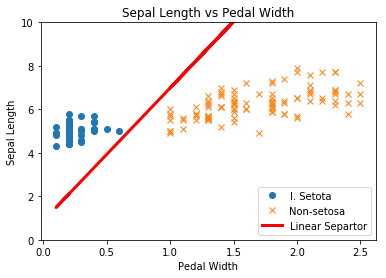

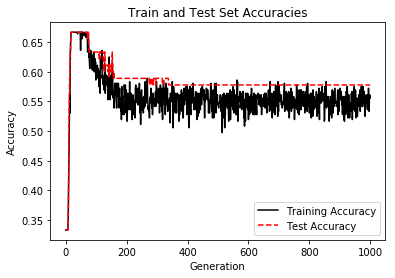

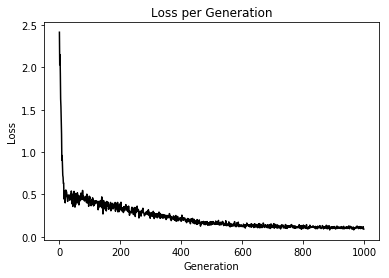

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
#Plot data and Line
plt.plot(setosa_x, setosa_y, 'o', label='I. Setota')
plt.plot(not_setosa_x,not_setosa_y, 'x', label = 'Non-setosa')
plt.plot(x1_vals, best_fit, 'r-',label='Linear Separtor',linewidth=3)
plt.ylim([0,10])
plt.legend(loc='lower right')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()

#plot train/test accuracies
plt.plot(train_accuracy, 'k-', label = 'Training Accuracy')
plt.plot(test_accuracy,'r--',label = 'Test Accuracy')
plt.title('Train and Test Set Accuracies')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

#Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()


In [ ]:
# wine data
from sklearn import datasets
wine = datasets.load_wine()
print("feature_data:",wine.data.shape)
print("feature_data:",wine.target.shape)
import numpy as np
X = np.array([[x[1],x[6]] for x in wine.data])
Y = np.array([1 if y==0 else -1 for y in wine.target])
print(len(Y))
train = np.random.choice(len(X),round(len(X)*0.8),replace=False)
test = np.array(list(set(range(len(X)))-set(train)))
X_tr = X[train]
X_te = X[test]
Y_tr = Y[train]
Y_te = Y[test]
print(Y_tr)
print(Y_te)
import tensorflow as tf
batch_size = len(train)
X_var = tf.placeholder(shape = [None, 2], dtype =tf.float32)
Y_var = tf.placeholder(shape = [None,1] , dtype =tf.float32)

W = tf.Variable(tf.random_normal(shape=[2,1]),name='weight')
B = tf.Variable(tf.random_normal(shape=[1,1]),name='bias')

print(X_var.shape)
print(W)

Output = tf.subtract(tf.matmul(X_var,W),B)
alpha = tf.constant([0.01])
#l2_norm
l2_norm = tf.reduce_sum(tf.square(W))
#margin_term in Loss
classification_term = tf.reduce_mean(tf.maximum(0.,tf.subtract(1.,tf.multiply(Output,Y_var))))
loss = tf.add(classification_term,tf.multiply(alpha,l2_norm))
# accuracy 및 optimizer정의
sess = tf.Session()
pred = tf.sign(Output)
accuracy = tf.reduce_mean(tf.cast(tf.equal(pred,Y),tf.float32))

my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)

init = tf.global_variables_initializer()
sess.run(init)

loss_vec = []
train_accuracy =[]
test_accuracy=[]
for i in range(1000):
    rand_index = np.random.choice(len(X_tr),size=batch_size)
    rand_x = X_tr[rand_index]
    rand_y = np.transpose([Y_tr[rand_index]])
    sess.run(train_step, feed_dict={
        X_var : rand_x,
        Y_var : rand_y
    })
    
    temp_loss = sess.run(loss,feed_dict={
        X_var : rand_x,
        Y_var : rand_y
    })
    loss_vec.append(temp_loss)
    
    train_acc_temp = sess.run(accuracy,feed_dict={
        X_var : rand_x,
        Y_var : np.transpose([Y_tr])
    })
    train_accuracy.append(train_acc_temp)
    
    test_acc_temp = sess.run(accuracy, feed_dict={
        X_var : X_te,
        Y_var : np.transpose([Y_te])
    })
    
    test_accuracy.append(test_acc_temp)
    
    if(i+1)%100==0:
        print('Step #{} W = {} B= {}'.format(str(i+1),str(sess.run(W)),str(sess.run(B))))
        print('Loss = ' + str(temp_loss))
        
#Ectract coefficients
[[a1],[a2]] = sess.run(W)
[[b]] = sess.run(B)
slope = -a2/a1
y_intercept = b/a1

#Extract x1 and x2 vals
x1_vals = [d[1] for d in X]

#Get best fit line
best_fit=[]
for i in x1_vals:
    best_fit.append(slope*i+y_intercept)

#Separate 1. class_0
class_0_x = [d[1] for i, d in enumerate(X) if Y[i] == 1]
class_0_y = [d[0] for i, d in enumerate(X) if Y[i] == 1]
not_class_0_x = [d[1] for i,d in enumerate(X) if Y[i] == -1]
not_class_0_y = [d[0] for i,d in enumerate(X) if Y[i] == -1]
from tensorflow.python.framework import ops
ops.reset_default_graph()
%matplotlib inline
import matplotlib.pyplot as plt
#Plot data and Line
plt.plot(class_0_x, class_0_y, 'o', label='I. class_0')
plt.plot(not_class_0_x,not_class_0_y, 'x', label = 'Non-class_0')
plt.plot(x1_vals,best_fit, 'r-',label='Linear Separtor',linewidth=3)
plt.ylim([0,5])
plt.legend(loc='lower right')
plt.title('malic_acid vs flavanoids')
plt.xlabel('malic_acid')
plt.ylabel('flavanoids')
plt.show()

#plot train/test accuracies
plt.plot(train_accuracy, 'k-', label = 'Training Accuracy')
plt.plot(test_accuracy,'r--',label = 'Test Accuracy')
plt.title('Train and Test Set Accuracies')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

#Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()
